In [1]:
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import time
import os
import numpy as np

from Utils import loader, loss
from Train import train
from Model import Model

In [2]:
#imdir_rs19 = '/home/physik/Dokumente/rs19/jpgs/rs19_val'
#maskdir_rs19 = '/home/physik/Dokumente/rs19/uint8/rs19_val'
imdir_rs19 = '/home/luis/Documents/ImSeg/rs19_val/jpgs/rs19_val'
maskdir_rs19 = '/home/luis/Documents/ImSeg/rs19_val/uint8/rs19_val'
classes_ = {"rail-track"}
range_train = (0,2)
range_test = (5,5)
range_val = (7,8)

In [3]:
traindata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_train[0],
                      numend=range_train[1],
                      classes=classes_)

testdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_test[0],
                      numend=range_test[1],
                      classes=classes_)

valdata = loader.dataset(imdir=imdir_rs19,
                      maskdir=maskdir_rs19,
                      numstart=range_val[0],
                      numend=range_val[1],
                      classes=classes_)

In [4]:
traindata[0][1].shape

torch.Size([1, 1080, 1920])

In [5]:
traindata[0][0].shape

torch.Size([3, 1080, 1920])

In [6]:
traindata[0][1].dtype

torch.float32

In [7]:
len(traindata)

3

In [8]:
batchsize = 1
#loss = torch.nn.BCEWithLogitsLoss()
lossf = loss.DiceLoss()
optim = 'Adam'
lr = 0.0005
momentum = 0.01
decay_rate = 0.9
decay_steps =400
num_epochs = 1000
model_path = ""

In [9]:
model = Model.UNet(num_classes=1,enc_channels=(3,16,32,64,128,256,512,1024),dec_channels=(1024,512,256,128,64,32,16))

In [10]:
Trainer = train.TrainSeg(model,
                         traindata,
                         testdata,
                         valdata,
                         classes_,
                         lossf,
                         optim,
                         batchsize,
                         lr,
                         momentum,
                         decay_rate,
                         decay_steps,
                         num_epochs,
                         model_path)

In [34]:
Trainer.train()

Epoch: 1/1000
Train loss: 0.952655, Test loss: 0.9116, Learning rate: 0.000500
Epoch: 2/1000
Train loss: 0.937642, Test loss: 0.9115, Learning rate: 0.000500
Epoch: 3/1000
Train loss: 0.932414, Test loss: 0.9114, Learning rate: 0.000500
Epoch: 4/1000
Train loss: 0.916474, Test loss: 0.9100, Learning rate: 0.000500
Epoch: 5/1000
Train loss: 0.905149, Test loss: 0.9067, Learning rate: 0.000500
Epoch: 6/1000
Train loss: 0.901778, Test loss: 0.8981, Learning rate: 0.000500
Epoch: 7/1000
Train loss: 0.892639, Test loss: 0.8909, Learning rate: 0.000500
Epoch: 8/1000
Train loss: 0.888029, Test loss: 0.9007, Learning rate: 0.000500
Epoch: 9/1000
Train loss: 0.887035, Test loss: 0.9072, Learning rate: 0.000500
Epoch: 10/1000
Train loss: 0.882221, Test loss: 0.9060, Learning rate: 0.000500
Epoch: 11/1000
Train loss: 0.884609, Test loss: 0.9008, Learning rate: 0.000500
Epoch: 12/1000
Train loss: 0.873711, Test loss: 0.9127, Learning rate: 0.000500
Epoch: 13/1000
Train loss: 0.872113, Test loss: 0

KeyboardInterrupt: 

In [ ]:
Trainer.val()

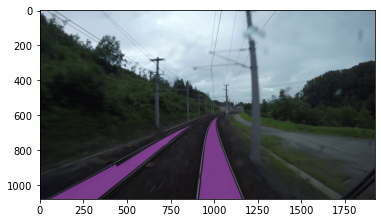

In [73]:
loader.visualize_result(traindata[0][0],traindata[0][1][0,:,:])

In [18]:
result = torch.sigmoid(model(traindata[1][0].unsqueeze(0)))

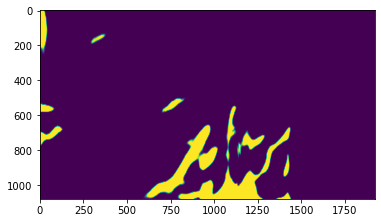

In [19]:
plt.imshow(result.detach().numpy()[0][0])

In [25]:
result[result>=0.5]=1.

In [ ]:
loader.visualize_result(traindata[0][0],result[0][0])

In [20]:
torch.min(result)

tensor(0.0004, grad_fn=<MinBackward1>)

In [21]:
torch.max(result)

tensor(1., grad_fn=<MaxBackward1>)

In [ ]:
result.shape

In [ ]:
zeros = torch.zeros((1,1080,1920))

In [ ]:
loss(result[0],traindata[0][1])

In [12]:
Trainer.model_path = "/home/luis/Documents/ImSeg/SavedModels/Model_24102022_2"

In [36]:
Trainer.save()

In [13]:
Trainer.load()